### Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

%matplotlib inline

### Read data

In [2]:
data = pd.read_csv("bike sharing day.csv")
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Check missing values

In [3]:
data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [4]:
data_new = data.drop(['instant', 'dteday', 'casual', 'registered'], axis = 1)

Convert to catogorical data and create dummy variables

In [5]:
data_new['season']=data_new['season'].astype('category')
data_new['weathersit']=data_new['weathersit'].astype('category')
data_new['mnth']=data_new['mnth'].astype('category')
data_new['weekday']=data_new['weekday'].astype('category')

In [6]:
data_new = pd.get_dummies(data_new)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


### Split training and test data

In [7]:
data_train, data_test = train_test_split(data_new, test_size = 0.30)

### Visualize numeric features

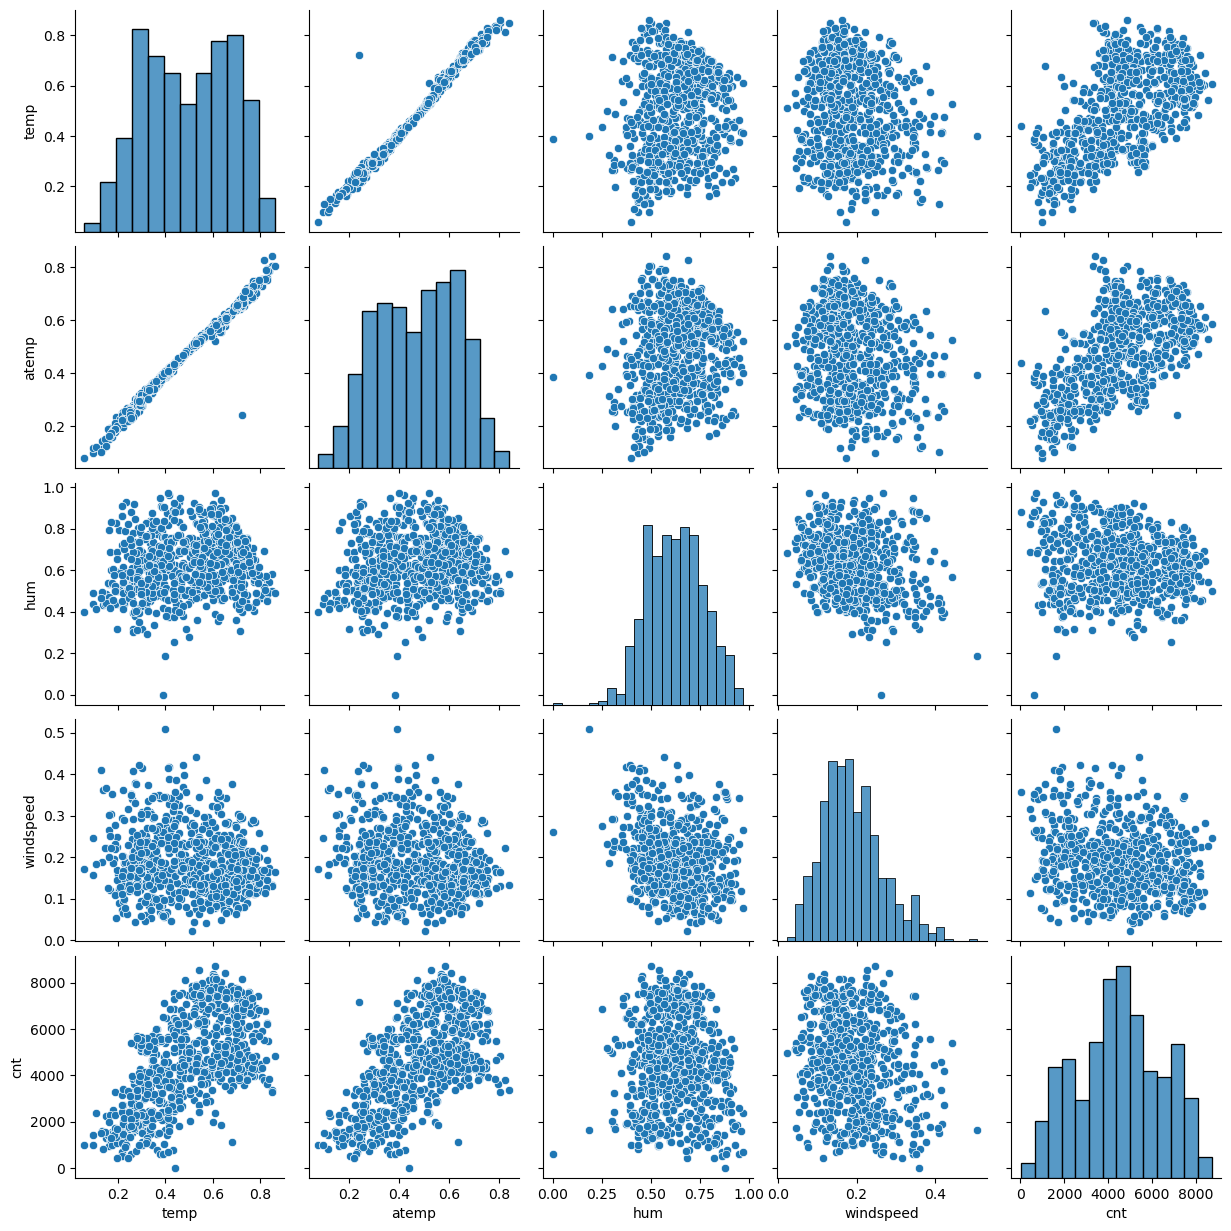

In [8]:
data_num = data_new[['temp', 'atemp', 'hum', 'windspeed', 'cnt']]

sns.pairplot(data_num)
plt.show()

There is a clear correlation between *temp*, *atemp* and *cnt*

### Visualize categorical features

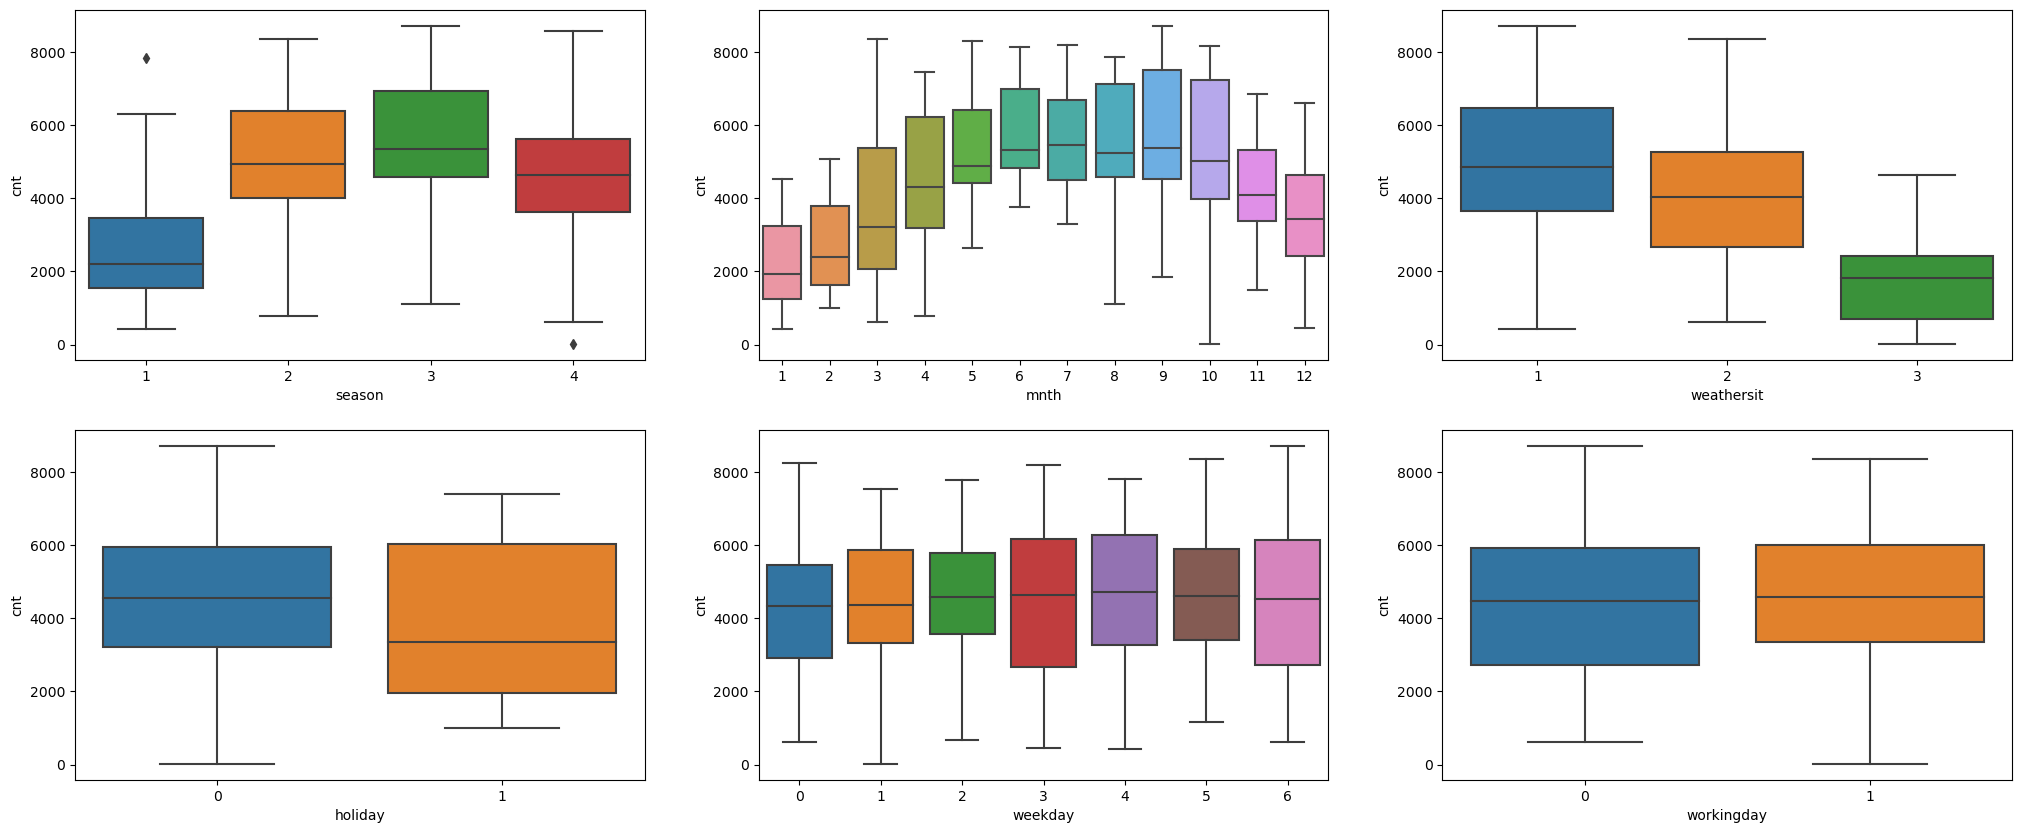

In [9]:
plt.figure(figsize=(25, 10))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = data)
plt.subplot(2,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = data)
plt.subplot(2,3,3)
sns.boxplot(x = 'weathersit', y = 'cnt', data = data)
plt.subplot(2,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = data)
plt.subplot(2,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = data)
plt.subplot(2,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = data)
plt.show()

From box plot we can see that, *season*, *mnth* and *weathersit* can be useful features.

### Correlation Matrix

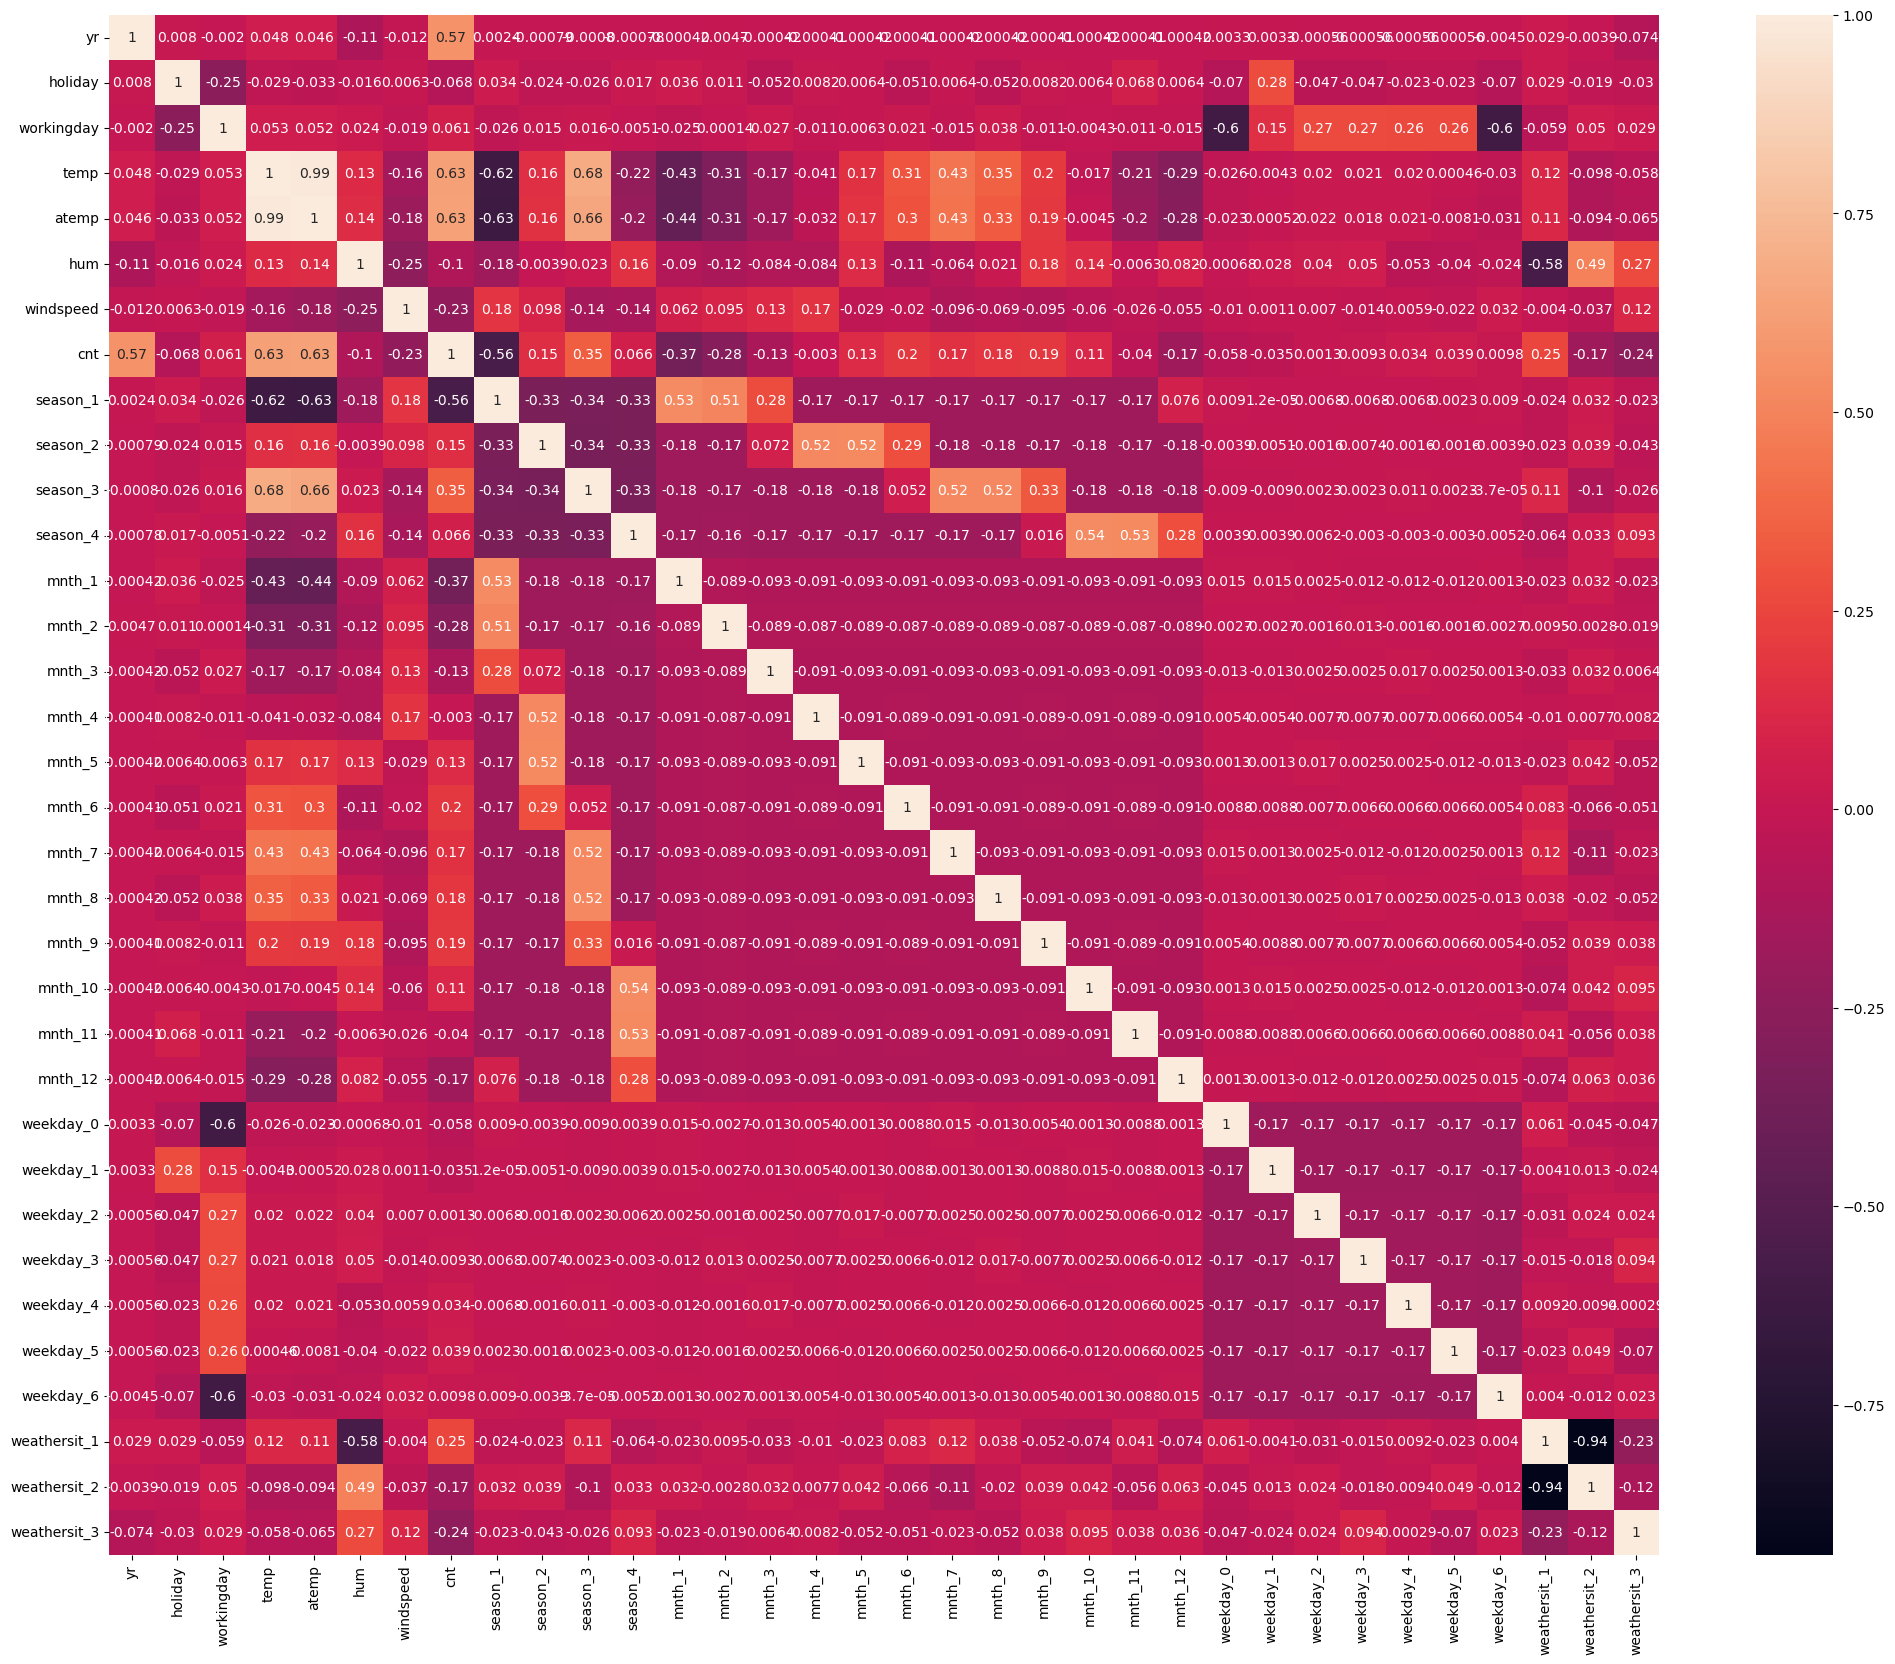

In [10]:
plt.figure(figsize = (25, 20))
sns.heatmap(data_new.corr(), annot = True)
plt.show()

### Scale data

In [11]:
Scale datascaler = MinMaxScaler()

num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
data_train[num_vars] = scaler.fit_transform(data_train[num_vars])

### Separate X and Y

In [12]:
Separate X and YX_train = data_train.drop('cnt', axis = 1)
y_train = data_train['cnt']

### Build linear regression model and run RFE

In [13]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select = 15)
rfe = rfe.fit(X_train, y_train)

In [14]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', False, 17),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', False, 18),
 ('windspeed', False, 19),
 ('season_1', True, 1),
 ('season_2', False, 3),
 ('season_3', False, 15),
 ('season_4', True, 1),
 ('mnth_1', False, 12),
 ('mnth_2', False, 9),
 ('mnth_3', True, 1),
 ('mnth_4', False, 10),
 ('mnth_5', False, 6),
 ('mnth_6', False, 8),
 ('mnth_7', True, 1),
 ('mnth_8', False, 11),
 ('mnth_9', True, 1),
 ('mnth_10', False, 7),
 ('mnth_11', True, 1),
 ('mnth_12', True, 1),
 ('weekday_0', False, 4),
 ('weekday_1', False, 2),
 ('weekday_2', False, 16),
 ('weekday_3', False, 14),
 ('weekday_4', False, 5),
 ('weekday_5', False, 13),
 ('weekday_6', True, 1),
 ('weathersit_1', True, 1),
 ('weathersit_2', True, 1),
 ('weathersit_3', True, 1)]

In [15]:
col = X_train.columns[rfe.support_]

In [16]:
X_train_rfe = X_train[col]

### Check VIF

In [17]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,155.47
3,atemp,153.82
12,weathersit_1,24.40
13,weathersit_2,13.23
4,season_1,3.04
5,season_4,2.26
14,weathersit_3,1.88
1,workingday,1.75
9,mnth_11,1.72
11,weekday_6,1.64


### Train Model 1

In [18]:
# Add a constant
X_train_lm1 = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr1 = sm.OLS(y_train, X_train_lm1).fit()

In [19]:
lr1.params

const           0.077475
holiday        -0.050940
workingday      0.034223
temp           -0.396363
atemp           0.920991
season_1       -0.131582
season_4        0.095933
mnth_3          0.036284
mnth_7         -0.118222
mnth_9          0.045779
mnth_11        -0.089792
mnth_12        -0.064228
weekday_6       0.067385
weathersit_1    0.172608
weathersit_2    0.082834
weathersit_3   -0.177966
dtype: float64

In [20]:
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.538
Method:                 Least Squares   F-statistic:                     43.46
Date:                Sun, 18 Dec 2022   Prob (F-statistic):           6.12e-77
Time:                        18:14:16   Log-Likelihood:                 219.11
No. Observations:                 511   AIC:                            -408.2
Df Residuals:                     496   BIC:                            -344.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0775      0.033      2.328   

Drop *atemp* because of high VIF and p-value

In [21]:
X_train_new = X_train_rfe.drop(['atemp'], axis = 1)

### Check VIF

In [22]:
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,weathersit_1,21.06
12,weathersit_2,11.45
2,temp,3.37
3,season_1,3.02
4,season_4,2.23
13,weathersit_3,1.81
1,workingday,1.75
8,mnth_11,1.72
10,weekday_6,1.64
9,mnth_12,1.38


### Train Model 2

In [23]:
# Add a constant
X_train_lm2 = sm.add_constant(X_train_new)

# Create a first fitted model
lr2 = sm.OLS(y_train, X_train_lm2).fit()

In [24]:
lr2.params

const           0.103230
holiday        -0.053592
workingday      0.034232
temp            0.452835
season_1       -0.137196
season_4        0.102023
mnth_3          0.040417
mnth_7         -0.117955
mnth_9          0.039411
mnth_11        -0.089899
mnth_12        -0.061170
weekday_6       0.065432
weathersit_1    0.185018
weathersit_2    0.095531
weathersit_3   -0.177320
dtype: float64

In [25]:
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.546
Model:                            OLS   Adj. R-squared:                  0.534
Method:                 Least Squares   F-statistic:                     45.95
Date:                Sun, 18 Dec 2022   Prob (F-statistic):           1.32e-76
Time:                        18:14:27   Log-Likelihood:                 216.26
No. Observations:                 511   AIC:                            -404.5
Df Residuals:                     497   BIC:                            -345.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1032      0.032      3.269   

Drop *weathersit_1* because of high VIF

In [26]:
X_train_new = X_train_new.drop(["weathersit_1"], axis = 1)

### Check VIF

In [27]:
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.02
1,workingday,4.96
4,season_4,2.56
8,mnth_11,1.78
3,season_1,1.77
10,weekday_6,1.71
11,weathersit_2,1.55
9,mnth_12,1.41
6,mnth_7,1.37
7,mnth_9,1.25


### Train Model 3

In [28]:
# Add a constant
X_train_lm3 = sm.add_constant(X_train_new)

# Create a first fitted model
lr3 = sm.OLS(y_train, X_train_lm3).fit()

In [29]:
lr3.params

const           0.288249
holiday        -0.053592
workingday      0.034232
temp            0.452835
season_1       -0.137196
season_4        0.102023
mnth_3          0.040417
mnth_7         -0.117955
mnth_9          0.039411
mnth_11        -0.089899
mnth_12        -0.061170
weekday_6       0.065432
weathersit_2   -0.089487
weathersit_3   -0.362338
dtype: float64

In [30]:
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.546
Model:                            OLS   Adj. R-squared:                  0.534
Method:                 Least Squares   F-statistic:                     45.95
Date:                Sun, 18 Dec 2022   Prob (F-statistic):           1.32e-76
Time:                        18:17:12   Log-Likelihood:                 216.26
No. Observations:                 511   AIC:                            -404.5
Df Residuals:                     497   BIC:                            -345.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2882      0.041      7.058   